In [64]:
import pandas as pd
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
plt.rcParams['figure.figsize'] = [10, 10]

In [2]:
all_df = pd.read_csv("./img/all9classes_predictions_24Apr2022.csv")
all_df

,Unnamed: 0,long_model,airline,photo_date,uploaded_date,location,uploader,photo_link,download_path,model,...,prob_A320,prob_A330,prob_A340,prob_A350,prob_A380,prob_B737,prob_B747,prob_B777,prob_B787,prediction_class
0,0,Airbus A320-212,Condor,Photo date: 2020-08-02,Uploaded: 2021-06-16,"Location: Las Palmas/Gran Canaria - GCLP, Spain",By: Carlos GCLP,cdn.jetphotos.com/400/6/34467_1622661605.jpg,./img/A320/cdn.jetphotos.com-400-6-34467_16226...,A320,...,4.608713,0.037520,-6.243953,-5.161450,-10.275373,-5.410842,-10.173352,-6.670581,0.296957,A320
1,1,Airbus A320-214,Uzbekistan Airways,Photo date: 2021-05-10,Uploaded: 2021-06-16,"Location: Minsk - UMMS, Belarus",By: Aleksandr Aleksandrovich,cdn.jetphotos.com/400/6/70881_1622659890.jpg,./img/A320/cdn.jetphotos.com-400-6-70881_16226...,A320,...,0.932177,0.111816,-6.694873,-1.728557,-2.201061,-4.854817,-9.974392,-1.234408,1.589709,B787
2,2,Airbus A320-214,LATAM Airlines,Photo date: 2021-06-02,Uploaded: 2021-06-16,Location: São José do Rio Preto Prof. Eribelto...,By: Paulo H Goncalez,cdn.jetphotos.com/400/6/13959_1622659712.jpg,./img/A320/cdn.jetphotos.com-400-6-13959_16226...,A320,...,2.901845,-5.829651,-8.445478,-9.203895,-3.077414,-3.973976,-5.831329,-8.020954,0.647858,A320
3,3,Airbus A320-214,easyJet Europe,Photo date: 2021-05-22,Uploaded: 2021-06-16,"Location: Tenerife Sur-Reina Sofía - GCTS, Spain",By: Pablo Marín,cdn.jetphotos.com/400/5/63632_1622659505.jpg,./img/A320/cdn.jetphotos.com-400-5-63632_16226...,A320,...,1.884817,0.285474,-4.578100,-3.597356,-7.540235,-2.319634,-6.535787,-5.310308,-3.415511,A320
4,4,Airbus A320-232,Cathay Dragon,Photo date: 2021-05-28,Uploaded: 2021-06-16,Location: Hong Kong-Chek Lap Kok Int'l Airport...,By: Jack Sin - HKPSA,cdn.jetphotos.com/400/6/79720_1622659434.jpg,./img/A320/cdn.jetphotos.com-400-6-79720_16226...,A320,...,1.213888,-2.620258,-13.385711,-9.931909,-7.741311,-4.847164,-8.151901,-2.988784,-2.383937,A320
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18715,18715,Boeing 787-9 Dreamliner,Air China,Photo date: 2021-01-28,Uploaded: 2021-05-10,"Location: Beijing Capital - ZBAA, China",By: PEK-359YuKai,cdn.jetphotos.com/400/5/32555_1619798641.jpg,./img/B787/cdn.jetphotos.com-400-5-32555_16197...,B787,...,-9.095678,-5.433685,-7.510596,-3.636426,-7.024997,1.385713,-12.014225,-0.448224,10.982339,B787
18716,18716,Boeing 787-10 Dreamliner,Singapore Airlines,Photo date: 2021-04-03,Uploaded: 2021-05-10,Location: Sydney Kingsford Smith Int'l Airport...,By: John Yu,cdn.jetphotos.com/400/5/23626_1619794499.jpg,./img/B787/cdn.jetphotos.com-400-5-23626_16197...,B787,...,-16.666270,-3.798345,-3.160605,-0.460778,-9.479517,-9.098138,-6.906954,-0.177244,5.397006,B787
18717,18717,Boeing 787-9 Dreamliner,Hainan Airlines,Photo date: 2021-04-30,Uploaded: 2021-05-10,"Location: Guangzhou Baiyun Airport - ZGGG, China",By: D_Y6888,cdn.jetphotos.com/400/5/14934_1619794714.jpg,./img/B787/cdn.jetphotos.com-400-5-14934_16197...,B787,...,-6.287135,-3.413683,-2.079430,-4.096567,-4.163179,-2.517676,-9.628612,-4.747547,0.666665,B787
18718,18718,Boeing 787-10 Dreamliner,Vietnam Airlines,Photo date: 2021-04-30,Uploaded: 2021-05-10,Location: Ho Chi Minh City Tan Son Nhat - VVTS...,By: Thanh Ho - SFAP,cdn.jetphotos.com/400/6/68078_1619793671.jpg,./img/B787/cdn.jetphotos.com-400-6-68078_16197...,B787,...,-0.658344,-1.971089,-4.506759,-0.003284,-3.451009,0.623530,-4.009578,-2.296066,1.751179,B787


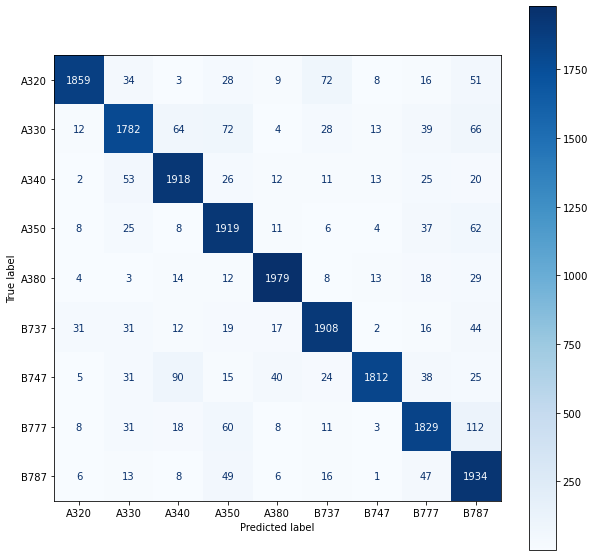

In [12]:
cm = confusion_matrix(all_df["model"], all_df["prediction_class"])
display_labels = pd.unique(all_df["model"])
cmd = ConfusionMatrixDisplay(cm, display_labels=display_labels)
cmd.plot(cmap="Blues")

# Visualise A380 errors

In [70]:
a380_correct = all_df.loc[(all_df.model=="A380") & (all_df.prediction_class=="A380"),:].sample(n=3, random_state=123)
a380_incorrect = all_df.loc[(all_df.model=="A380") & (all_df.prediction_class!="A380"),:].sample(n=6, random_state=123)

In [71]:
a380_correct

,Unnamed: 0,long_model,airline,photo_date,uploaded_date,location,uploader,photo_link,download_path,model,...,prob_A320,prob_A330,prob_A340,prob_A350,prob_A380,prob_B737,prob_B747,prob_B777,prob_B787,prediction_class
8610,8610,Airbus A380-861,Emirates,Photo date: 2016-07-23,Uploaded: 2021-04-17,Location: New York John F. Kennedy Int'l Airpo...,By: Kenneth Mora Flores KMF777,cdn.jetphotos.com/400/6/65915_1617838145.jpg,./img/A380/cdn.jetphotos.com-400-6-65915_16178...,A380,...,-5.973104,-9.680321,-10.042911,-7.907043,2.712939,-4.194120,-6.113430,-0.079245,-3.520616,A380
9289,9289,Airbus A380-841,Lufthansa,Photo date: 2019-07-11,Uploaded: 2020-12-24,"Location: San Francisco Int'l Airport - KSFO, ...",By: Kendrick Dlima,cdn.jetphotos.com/400/6/91219_1608525241.jpg,./img/A380/cdn.jetphotos.com-400-6-91219_16085...,A380,...,-4.052802,-6.941069,-15.206885,-10.748791,6.559313,-3.065403,-7.369343,-6.575371,-4.229944,A380
8614,8614,Airbus A380-841,British Airways,Photo date: 2020-03-01,Uploaded: 2021-04-16,"Location: London Heathrow Int'l - EGLL, United...",By: Jackson Heydon,cdn.jetphotos.com/400/5/35479_1617794480.jpg,./img/A380/cdn.jetphotos.com-400-5-35479_16177...,A380,...,-12.033920,-13.705460,-10.258568,-4.635756,10.454412,-13.737634,-1.936168,-4.034763,-3.055313,A380


In [72]:
a380_incorrect

,Unnamed: 0,long_model,airline,photo_date,uploaded_date,location,uploader,photo_link,download_path,model,...,prob_A320,prob_A330,prob_A340,prob_A350,prob_A380,prob_B737,prob_B747,prob_B777,prob_B787,prediction_class
8480,8480,Airbus A380-841,Asiana Airlines,Photo date: 2020-10-25,Uploaded: 2021-05-07,"Location: Seoul Incheon Int'l - RKSI, South Korea",By: YoungKyun Shin,cdn.jetphotos.com/400/6/58941_1619523703.jpg,./img/A380/cdn.jetphotos.com-400-6-58941_16195...,A380,...,-5.818169,-2.121737,-3.352959,-0.755634,-3.050247,-6.576940,-3.458429,1.184930,4.570091,B787
9848,9848,Airbus A380-841,China Southern Airlines,Photo date: 2020-08-01,Uploaded: 2020-10-14,"Location: Los Angeles Int'l Airport - KLAX, US...",By: Eric Page Lu,cdn.jetphotos.com/400/5/14624_1602133392.jpg,./img/A380/cdn.jetphotos.com-400-5-14624_16021...,A380,...,-9.752643,0.170767,-1.540634,-0.939924,-0.147024,-10.488986,-4.072439,3.465728,-6.020981,B777
10068,10068,Airbus A380-841,China Southern Airlines,Photo date: 2020-06-23,Uploaded: 2020-09-13,Location: Toronto Lester B. Pearson Int'l Airp...,By: Leige Yang,cdn.jetphotos.com/400/6/53027_1598888398.jpg,./img/A380/cdn.jetphotos.com-400-6-53027_15988...,A380,...,-5.649754,-4.000363,-1.790220,0.670433,-1.091789,-2.946662,-5.886280,-5.253930,-2.773276,A350
8903,8903,Airbus A380-841,Malaysia Airlines,Photo date: 2019-12-19,Uploaded: 2021-02-15,Location: Kuala Lumpur Sepang Int'l Airport - ...,By: Nigel Shim,cdn.jetphotos.com/400/5/47462_1612972964.jpg,./img/A380/cdn.jetphotos.com-400-5-47462_16129...,A380,...,-2.965088,-5.640058,-9.073485,-3.816633,0.825823,-3.821691,-5.622725,-6.431660,1.668815,B787
9764,9764,Airbus A380-841,Singapore Airlines,Photo date: 2020-10-04,Uploaded: 2020-10-28,"Location: Zurich-Kloten Airport - LSZH, Switze...",By: Joel Basler,cdn.jetphotos.com/400/5/58907_1603224557.jpg,./img/A380/cdn.jetphotos.com-400-5-58907_16032...,A380,...,-9.564482,-7.086885,-8.995487,-1.290664,-0.113425,-3.838351,-9.654280,-4.160378,3.553138,B787
8322,8322,Airbus A380-841,China Southern Airlines,Photo date: 2021-05-19,Uploaded: 2021-06-15,"Location: Guangzhou Baiyun Airport - ZGGG, China",By: Fang Xiaoyu,cdn.jetphotos.com/400/6/74070_1622628386.jpg,./img/A380/cdn.jetphotos.com-400-6-74070_16226...,A380,...,-8.256781,-0.341486,3.389492,-1.638403,1.057158,-16.475735,-4.390147,-1.021569,-6.425057,A340


In [73]:
img_df = pd.concat([a380_correct, a380_incorrect], axis=0)
img_df["download_path"].values

array(['./img/A380/cdn.jetphotos.com-400-6-65915_1617838145.jpg',
       './img/A380/cdn.jetphotos.com-400-6-91219_1608525241.jpg',
       './img/A380/cdn.jetphotos.com-400-5-35479_1617794480.jpg',
       './img/A380/cdn.jetphotos.com-400-6-58941_1619523703.jpg',
       './img/A380/cdn.jetphotos.com-400-5-14624_1602133392.jpg',
       './img/A380/cdn.jetphotos.com-400-6-53027_1598888398.jpg',
       './img/A380/cdn.jetphotos.com-400-5-47462_1612972964.jpg',
       './img/A380/cdn.jetphotos.com-400-5-58907_1603224557.jpg',
       './img/A380/cdn.jetphotos.com-400-6-74070_1622628386.jpg'],
      dtype=object)

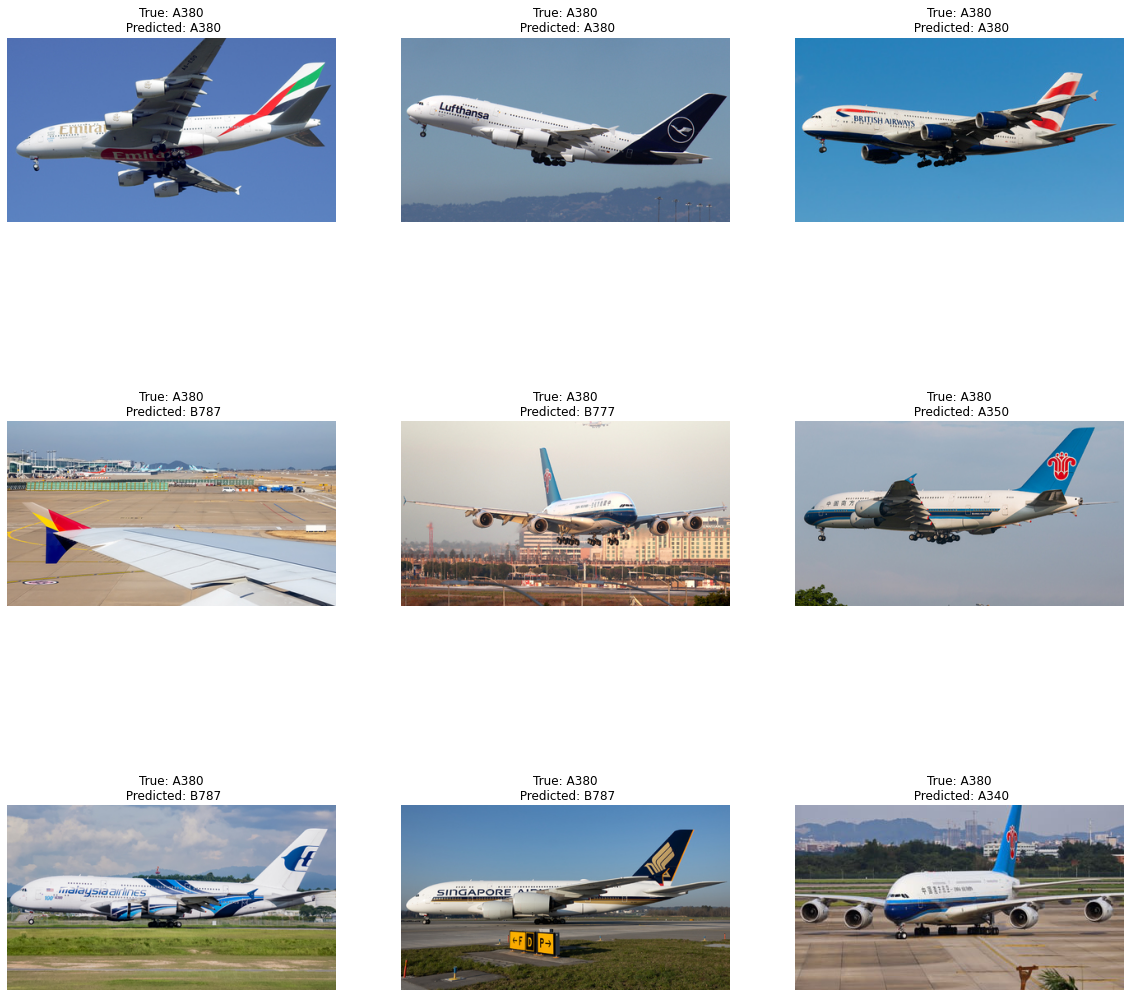

In [74]:
plt.figure(figsize=(20, 20))
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    img = mpimg.imread(img_df["download_path"].values[i])
    plt.imshow(img)
    plt.axis("off")
    title = "True: " + img_df["model"].values[i] + "\n Predicted: " + img_df["prediction_class"].values[i]
    ax.set_title(title)

In [75]:
"True: " + img_df["model"].values[i], "\n Predicted: " + img_df["prediction_class"].values[i]

('True: A380', '\n Predicted: A340')

In [69]:
import json
import shap
import tensorflow as tf

ModuleNotFoundError: No module named 'shap'